# CA2(2) Tune a bit hyper-parameters

In [1]:
"""
 * \file
     *  MLoN CA2 Logistic Ridge Regression_part(2)
 * \author
 *  Wenqing Yan <wenqing.yan@it.uu.se>
"""

## Read the clean data
import pandas as pd
import numpy as np
import time

df = pd.read_csv('household_power_consumption.csv')

In [2]:
values = df.values

X = df.iloc[:, 0:7].values
y = df.iloc[:, -1].values

In [3]:
# Split XY into training set and test set of equal size

from sklearn.model_selection import train_test_split
train, test = train_test_split(values, test_size = 0.3)

train_x, train_y = train[:, 0:7], train[:, -1]
test_x, test_y = test[:, :7], test[:, -1]

# Possible HP List

In [4]:
#Hyper Parameters List:
    #GD(fixed iteration number): #Learning rate: lr; #Number of iteration: num_iter; 
    #Regularization term: lamda
    
    #SGDClassifier: #Learning rate: learning_rate; #Max number of iteration: max_iter; 
    #Regularization term: alpha; #Stopping criterion: tol;
    
    #LogisticRegressionCV(with cross validation): #Max number of iteration: max_iter; 
    #Regularization term: Cs (1/lamda, a list after cv find the best one); 
    #Number of cv fold: cv; ##Stopping criterion: tol;

#Tuning method
    #Normal: CV, or naive method
    #Several HPs: GridSearch

## Naive method - GD Version 2

In [5]:
class LogisticRidgeRegression:
    def __init__(self, lr=0.01, num_iter=100000, lamda=1):
        self.lr = lr
        self.num_iter = num_iter
        self.lamda = lamda
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def __loss(self, h, y, theta):
        y = y[:, np.newaxis]
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean() + self.lamda * sum(theta**2)
    
    def fit(self, X, y):
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        for i in range(self.num_iter):
            z = X @ self.theta
            h = self.__sigmoid(z)
            gradient = (X.T @ (h - y)) / y.shape[0] + 2*self.lamda * self.theta
            self.theta -= self.lr * gradient
    
    def predict_prob(self, X):
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold

### Penalty: lamda

In [69]:
from sklearn.metrics import make_scorer
from numpy import nan

# default: lr=0.1, num_iter=100


# Tuning lamda with CV (cv=5)
lamda = np.linspace(1, 10, 10)
scores= pd.DataFrame(lamda, columns = ['lamda'])
scores['scores'] = nan
print(scores)

   lamda  scores
0    1.0     NaN
1    2.0     NaN
2    3.0     NaN
3    4.0     NaN
4    5.0     NaN
5    6.0     NaN
6    7.0     NaN
7    8.0     NaN
8    9.0     NaN
9   10.0     NaN


In [11]:
from sklearn.metrics import make_scorer
from numpy import nan

# default: lr=0.1, num_iter=100


# Tuning lamda with CV (cv=5)
lamda = np.linspace(1, 10, 10)
scores= pd.DataFrame(lamda, columns = ['lamda'])
scores['scores'] = nan
for i in range(len(lamda)):
    clf = LogisticRidgeRegression(lr=0.1, num_iter=100, lamda=lamda[i])
    clf.fit(train_x, train_y)
    preds = clf.predict(test_x, 0.5)
    scores.iloc[i,1] = (preds == test_y).mean()
scores

lamda    scores
0    1.0  0.749601
1    2.0  0.749598
2    3.0  0.749596
3    4.0  0.749593
4    5.0  0.749593
5    6.0  0.749591
6    7.0  0.749591
7    8.0  0.749591
8    9.0  0.749591
9   10.0  0.250443

Text(0.5, 1.0, 'Tuning HP: lamda')

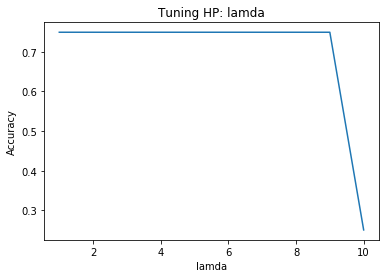

In [12]:
import matplotlib.pyplot as plt
plt.plot(lamda, scores['scores'])
plt.xlabel("lamda") 
plt.ylabel("Accuracy") 
plt.title('Tuning HP: lamda')
#savefig('LogisticRidge_lamda.png')

In [73]:
from sklearn.metrics import make_scorer
from numpy import nan

# default: lr=0.1, num_iter=100


# Tuning lamda with CV (cv=5)
lamda = np.linspace(0.1, 1, 10)
scores= pd.DataFrame(lamda, columns = ['lamda'])
scores['scores'] = nan
for i in range(len(lamda)):
    clf = LogisticRidgeRegression(lr=0.1, num_iter=100, lamda=lamda[i])
    clf.fit(train_x, train_y)
    preds = clf.predict(test_x, 0.5)
    scores.iloc[i,1] = (preds == test_y).mean()
scores

lamda    scores
0    0.1  0.749851
1    0.2  0.749557
2    0.3  0.749463
3    0.4  0.749421
4    0.5  0.749398
5    0.6  0.749382
6    0.7  0.749378
7    0.8  0.749371
8    0.9  0.749365
9    1.0  0.749365

Text(0.5, 1.0, 'Tuning HP: lamda')

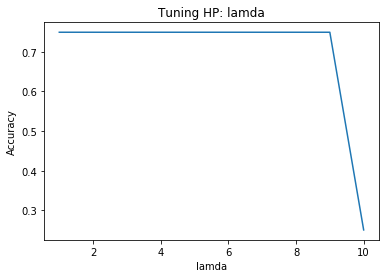

In [13]:
import matplotlib.pyplot as plt
plt.plot(lamda, scores['scores'])
plt.xlabel("lamda") 
plt.ylabel("Accuracy") 
plt.title('Tuning HP: lamda')
#savefig('LogisticRidge_lamda.png')

### Number Iteration: num_iter

In [83]:
# default: lr=0.1, lamda = 1
num_iter = np.arange(1,100,10)
scores= pd.DataFrame(num_iter, columns = ['num_iter'])
scores['scores'] = nan
for i in range(len(num_iter)):
    clf = LogisticRidgeRegression(lr=0.1, num_iter=num_iter[i], lamda=1)
    clf.fit(train_x, train_y)
    preds = clf.predict(test_x, 0.5)
    scores.iloc[i,1] = (preds == test_y).mean()
scores

num_iter    scores
0         1  0.749590
1        11  0.749601
2        21  0.749601
3        31  0.749601
4        41  0.749601
5        51  0.749601
6        61  0.749601
7        71  0.749601
8        81  0.749601
9        91  0.749601

Text(0, 0.5, 'Acuracy')

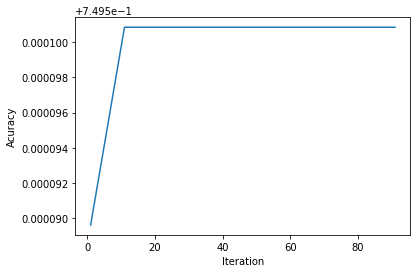

In [84]:
import matplotlib.pyplot as plt
plt.plot(num_iter, scores['scores'])
plt.xlabel("Iteration") 
plt.ylabel("Acuracy") 
#savefig('LogisticRidge_iteration_.png')

### Learning Rate: lr

In [64]:
# default: num_iter=100, lamda = 1
lr = np.linspace(0.01, 0.018, 20)
scores= pd.DataFrame(lr, columns = ['learning_rate'])
scores['scores'] = nan
for i in range(len(lr)):
    clf = LogisticRidgeRegression(lr=lr[i], num_iter=100, lamda=1)
    clf.fit(train_x, train_y)
    preds = clf.predict(test_x, 0.5)
    scores.iloc[i,1] = (preds == test_y).mean()
scores

learning_rate    scores
0        0.010000  0.749360
1        0.010421  0.749360
2        0.010842  0.749362
3        0.011263  0.749362
4        0.011684  0.749362
5        0.012105  0.749362
6        0.012526  0.749362
7        0.012947  0.749362
8        0.013368  0.749362
9        0.013789  0.749362
10       0.014211  0.749362
11       0.014632  0.749363
12       0.015053  0.749363
13       0.015474  0.749363
14       0.015895  0.749363
15       0.016316  0.749365
16       0.016737  0.749365
17       0.017158  0.749365
18       0.017579  0.749365
19       0.018000  0.749365

In [65]:
import matplotlib.pyplot as plt
plt.plot(lr, scores['scores'])
plt.xlabel("Learning Rate") 
plt.ylabel("Acuracy") 
#savefig('LogisticRidge_iteration_.png')

Text(0,0.5,'Acuracy')

## GridSearchCV - SAG
SGDClassifier(#Max number of iteration: max_iter; #Regularization term: alpha; #Stopping criterion: tol)
max_iter and tol are two features control if the function can converge, if setup not suitable, can not find the convergence solution

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

#Default: loss='log': logistic regression; 
#penalty='l2':l2 regularization; 
#cv=5: 5 folds cv; 
#scoring='accuracy': model performance evaluation metric
#learning_rate='optimal': eta=1.0/(aplpha*(t+t0), where t0 is chosen 
#by heuristic proposed by Leon Bottou
tuned_parameters = [{'alpha': [1e-6, 1e-5, 1e-4], 'max_iter': [100, 500, 1000], 
                     'tol': [1e-5,1e-4, 1e-3]}]
regr = GridSearchCV(SGDClassifier(loss='log', penalty="l2", average=True, 
                                  learning_rate='optimal'), 
                    tuned_parameters,cv=5, scoring = 'accuracy', n_jobs=-1)
regr.fit(X, y)
result = regr.cv_results_['mean_test_score']
print(result)

[0.96199461 0.96193148 0.961891   0.9619893  0.96193726 0.96189389
 0.96199123 0.96192859 0.96188618 0.95829627 0.95828615 0.95828278
 0.9582982  0.95828856 0.95828615 0.95829675 0.95828856 0.95828181
 0.94398865 0.94398961 0.94398865 0.9439901  0.94398961 0.94398624
 0.94398865 0.94399251 0.94399251]


In [45]:
print('Case with SGD method:')
best_para = regr.best_params_
print('Best hyper-para: ', best_para)
best_model = regr.best_estimator_
y_pred = best_model.predict(test_x)
from sklearn.metrics import accuracy_score
print('Current accuracy: ', accuracy_score(test_y, y_pred))

Case with SGD method:
Best hyper-para:  {'alpha': 1e-06, 'max_iter': 100, 'tol': 1e-05}
Current accuracy:  0.9623597364506937


## GridSearchCV - SGD
hyper-para considered:
1. lemda = alpha #constant that multiplies the regularization term
2. max_iter #the maximum num of passes over the training data
3. tol #the stopping critertion
4. learning rate  #the learning rate schedule, in our case, we set it with module 'optimal'

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

# Default: loss='log': logistic regression; 
            #penalty='l2':l2 regularization; 
            #cv=5: 5 folds cv; 
            #scoring='accuracy': model performance evaluation metric
            #learning_rate='optimal': eta=1.0/(aplpha*(t+t0), where t0 is chosen by 
            #heuristic proposed by Leon Bottou
tuned_parameters = [{'alpha': [1e-6, 1e-5, 1e-4, 1e-3], 'max_iter': [100, 1000, 2000], 
                     'tol': [1e-5,1e-4, 1e-3]}]
regr = GridSearchCV(SGDClassifier(loss='log', penalty="l2", average=False,
                                 learning_rate= 'optimal'), 
                    tuned_parameters, cv=5, scoring = 'accuracy', n_jobs=-1)
regr.fit(train_x, train_y)
result = regr.cv_results_['mean_test_score']
print(result)

[0.96123716 0.96149462 0.96299804 0.96351296 0.96411667 0.95965388
 0.96403406 0.95873007 0.9581835  0.95699879 0.95838932 0.95820415
 0.95803893 0.96053295 0.95722045 0.95790401 0.95984525 0.95688796
 0.94444613 0.94411226 0.94362557 0.94454801 0.94400212 0.94428986
 0.94458725 0.94398698 0.94470358 0.91407949 0.91419996 0.91414902
 0.91389983 0.91475824 0.91325825 0.91384131 0.91372635 0.91411047]


In [47]:
print('Case with SGD method:')
best_para = regr.best_params_
print('Best hyper-para: ', best_para)
best_model = regr.best_estimator_
y_pred = best_model.predict(test_x)
from sklearn.metrics import accuracy_score
print('Current accuracy: ', accuracy_score(test_y, y_pred))

Case with SGD method:
Best hyper-para:  {'alpha': 1e-06, 'max_iter': 1000, 'tol': 0.0001}
Current accuracy:  0.960172058762115


## SVRG
hyper-para considered:
1. C # C  = 1/lemda,  level of penalization
2. max_iter #maximum num of iterations
3. tol #the stopping critertion

### Penalty: C = 1/ lamda

In [77]:
from tick.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
from numpy import nan

# default: max_iter = 1000, tol = 1e-5


# Tuning C with CV (cv=5)
C = [1e2, 1e3, 1e4, 1e5, 1e6, 1e8]
scores= pd.DataFrame(C, columns = ['C'])
scores['scores'] = nan
for i in range(len(C)):
    learner = LogisticRegression(solver='svrg', penalty= 'l2', tol= 1e-05, max_iter=1000,
                            C= C[i])
    learner.fit(train_x, train_y)
    preds = learner.predict(test_x)
    scores.iloc[i,1] = (preds == test_y).mean()
scores

C    scores
0        100.0  0.825530
1       1000.0  0.913603
2      10000.0  0.943991
3     100000.0  0.958436
4    1000000.0  0.962262
5  100000000.0  0.962830

Text(0.5, 1.0, 'Tuning HP: C')

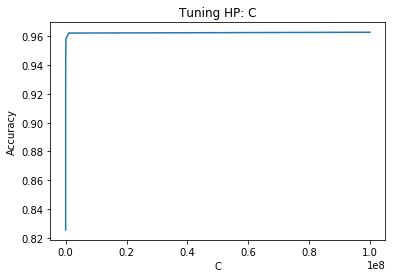

In [79]:
import matplotlib.pyplot as plt
plt.plot(C, scores['scores'])
plt.xlabel("C") 
plt.ylabel("Accuracy") 
plt.title('Tuning HP: C')

### Number Iteration: num_iter

In [82]:
from tick.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
from numpy import nan

# default: C = 100000, tol = 1e-5


# Tuning max_iter with CV (cv=5)
tune_para = [1e2, 1e3, 1e4, 1e5, 1e6, 1e8]
scores= pd.DataFrame(tune_para, columns = ['max_iter'])
scores['scores'] = nan
scores

max_iter  scores
0        100.0     NaN
1       1000.0     NaN
2      10000.0     NaN
3     100000.0     NaN
4    1000000.0     NaN
5  100000000.0     NaN

In [93]:
from tick.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
from numpy import nan

# default: C = 100000, tol = 1e-5


# Tuning max_iter with CV (cv=5)
tune_para = [10, 1e2, 1e3, 1e6]
scores= pd.DataFrame(tune_para, columns = ['max_iter'])
scores['scores'] = nan
for i in range(len(tune_para)):
    learner = LogisticRegression(solver='svrg', penalty= 'l2', tol= 1e-05, C=100000, 
                                 max_iter= int (tune_para[i]))
    learner.fit(train_x, train_y)
    preds = learner.predict(test_x)
    scores.iloc[i,1] = (preds == test_y).mean()
scores

max_iter    scores
0       10.0  0.958436
1      100.0  0.958436
2     1000.0  0.958436
3  1000000.0  0.958436

In [94]:
import matplotlib.pyplot as plt
plt.plot(tune_para, scores['scores'])
plt.xlabel("# Max Iteration") 
plt.ylabel("Acuracy") 

Text(0, 0.5, 'Acuracy')

### tol: the stopping criterion

In [99]:
from tick.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
from numpy import nan

# default: C = 100000, max-iter = 1000


# Tuning tol with CV (cv=5)
tune_para = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
scores= pd.DataFrame(tune_para, columns = ['tol'])
scores['scores'] = nan
for i in range(len(tune_para)):
    learner = LogisticRegression(solver='svrg', penalty= 'l2', tol= tune_para[i], C=100000, 
                                 max_iter= 1000)
    learner.fit(train_x, train_y)
    preds = learner.predict(test_x)
    scores.iloc[i,1] = (preds == test_y).mean()
scores

tol    scores
0  1.000000e-03  0.958436
1  1.000000e-04  0.958436
2  1.000000e-05  0.958436
3  1.000000e-06  0.958436
4  1.000000e-07  0.958436

Text(0, 0.5, 'Acuracy')

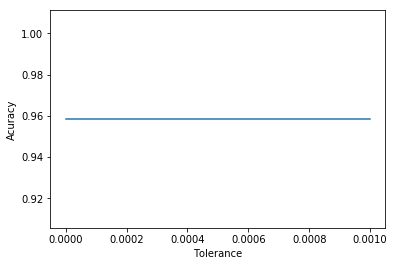

In [101]:
import matplotlib.pyplot as plt
plt.plot(tune_para, scores['scores'])
plt.xlabel("Tolerance") 
plt.ylabel("Acuracy") 

In [97]:
#from above curves, the suitable set-up for hyper-para including C(1/lamda,), max_iter and
#tol can be as follows:

#C = 100000
#max_iter = 1000
#tol = 1e-5